<a href="https://colab.research.google.com/github/kchu1711/actl3143/blob/main/w1_chess_ai_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACTL3143/5111 Week 1 StoryWall Notebook

This notebook contains helper functions to get a basic Chess AI running. We will go over this code in the lecture, as well as fill in the missing 'minimax' algorithm.

In [14]:
#install a package for chess
%pip install chess

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\kchu1\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [15]:
import chess
import math
import random
from IPython import display

In [16]:
STANDARD_PIECE_VALUES = {"P": 1, "N": 3, "B": 3,
                         "R": 5, "Q": 9, "K": 0}

def static_evaluation(board):
    if board.is_game_over():
        outcome = board.outcome()
        if outcome.winner == chess.WHITE:
            return 1_000_000
        elif outcome.winner == chess.BLACK:
            return -1_000_000
        else:
            return 0

    pointsBalance = 0
    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece:
          pieceValue = STANDARD_PIECE_VALUES[piece.symbol().upper()]
          if piece.symbol().isupper():
              pointsBalance += pieceValue
          else:
              pointsBalance -= pieceValue

    return pointsBalance

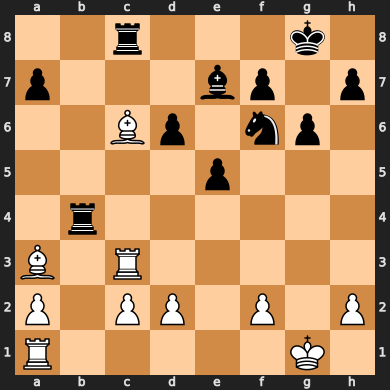

In [4]:
# Testing 'static_evaluation' on the game from the slides.
board = chess.Board("2r3k1/p3bp1p/2Bp1np1/4p3/1r6/B1R5/P1PP1P1P/R5K1 b - - 0 1")
board

In [17]:
# Expect this to be -1 (i.e. black up one pawn)
static_evaluation(board)

0

Pseudocode to evaluate the 'minimax' algorithm's value of a chess board position.

```
function minimax (position, depth, maximizingPlayer)
  if depth == 0 or game over in position
    return static evaluation of position

  if maximizingPlayer
    maxEval = -infinity
    for each child of position
      eval = minimax(child, depth - 1, false)
      maxEval = max(maxEval, eval)
    return maxEval
  else
    minEval = infinity
    for each child of position
      eval = minimax(child, depth - 1, true)
      minEval = min(minEval, eval)
    return minEval
```

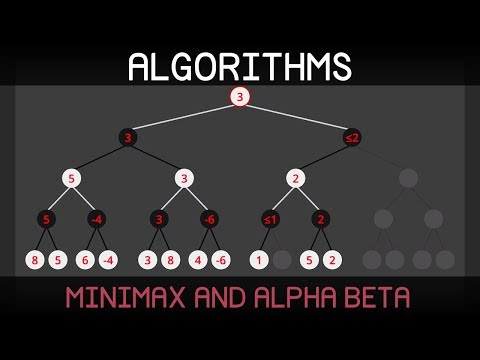

In [18]:
# Source of pseudocode: Around 3-4 minute mark of the following video.
display.YouTubeVideo('l-hh51ncgDI')

**TODO in lecture:** Create a 'minimax' function here, according to the pseudocode above.

In [19]:
def minimax(position, depth):
  if depth == 0 or board.is_game_over():
    return static_evaluation(board)

  scores = []
  for move in board.legal_moves:
    board.push(move)
    evalMove = minimax(board , depth-1)
    scores.append(evalMove)
    board.pop()

  maxPlayer = (board.turn == chess.WHITE)
  if maxPlayer:
    bestScore = max(scores)
  else:
    bestScore = min(scores)

  return bestScore

**TODO for StoryWall**: Update the 'minimax' function to include the alpha-beta pruning extension.

Pseudocode to evaluate the 'minimax' algorithm's value of a chess board position, including alpha-beta pruning 

```
function minimax (position, depth, maximizingPlayer)
  if depth == 0 or game over in position
    return static evaluation of position

  if maximizingPlayer
    maxEval = -infinity
    for each child of position
      eval = minimax(child, depth - 1, false)
      maxEval = max(maxEval, eval)
      alpha = max(alpha,eval)
      if beta <= elpha
        break
    return maxEval
  else
    minEval = infinity
    for each child of position
      eval = minimax(child, depth - 1, true)
      minEval = min(minEval, eval)
      beta = min(beta, eval)
      if beta <= alpha
        break
    return minEval
```

In [23]:
def minimax(position, depth, alpha=1_000_000, beta=-1_000_000):
  if depth == 0 or board.is_game_over():
    return static_evaluation(board)

  maxPlayer = (board.turn == chess.WHITE)

  if maxPlayer:
    maxEval = -1_000_000
    for move in board.legal_moves:
      board.push(move)
      evalMove = minimax(board, depth-1,alpha,beta)
      board.pop()
      maxEval = max(maxEval, evalMove)
      alpha = max(alpha,evalMove)
      if beta <= alpha:
        break
    return maxEval

  else:
    minEval = 1_000_000
    for move in board.legal_moves:
      board.push(move)
      evalMove = minimax(board, depth-1, alpha, beta)
      board.pop()
      minEval = min(minEval, evalMove)
      beta = min(beta,evalMove)
      if beta <= alpha:
        break
    return minEval

## Watch a game of AI versus AI

The following code will play a weaker AI (minimax with depth 2) against a stronger AI (minimax with depth 3).

In [20]:
def choose_move(board, depth=2):
  
    options = list(board.legal_moves)
    scores = []

    for move in options:
        board.push(move)
        scores.append(minimax(board, depth-1))
        board.pop()
        
    maximisingPlayer = board.turn == chess.WHITE
  
    if maximisingPlayer:
        bestScore = max(scores)
    else:
        bestScore = min(scores)
    
    bestOptions = []
    for move, score in zip(options, scores):
        if score == bestScore:
            bestOptions.append(move)

    return random.choice(bestOptions)

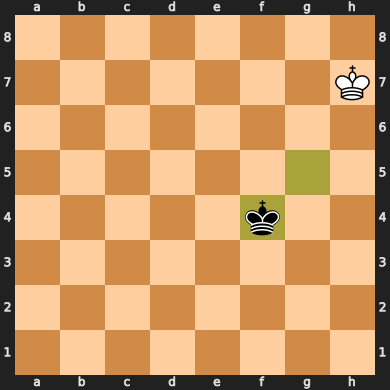

Move #304: Score = 0


In [24]:
random.seed(42)

board = chess.Board()
display.display(board)

moveNumber = 1
while not board.is_game_over():
    
    moves = list(board.legal_moves)
    if len(moves) == 0:
        print("No moves are possible!")
        break
    
    if board.turn == chess.WHITE:
        move = choose_move(board, depth=2)
    else:
        move = choose_move(board, depth=3)
        
    board.push(move)
    
    display.clear_output(wait=True)
    display.display(board)
              
    print(f"Move #{moveNumber}: Score = {static_evaluation(board)}")
    moveNumber += 1

## Playing against the AI

The following sections can be used if you want to play a game against the AI you just built.

In [18]:
def ask_human_move(board):
    options = [board.san(move) for move in board.legal_moves]
    print(options)
    print()
    
    while True:
        reqMove = input("Choose a move: ")
        if reqMove in options:
            break
        else:
            print(f"Invalid move '{reqMove}'")
    
    return board.parse_san(reqMove)

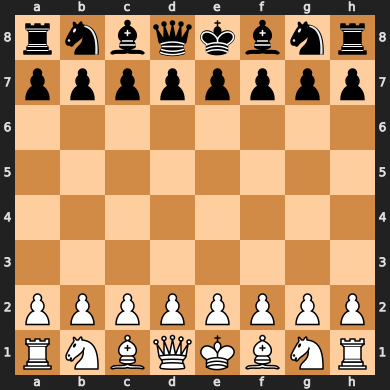

['Nh3', 'Nf3', 'Nc3', 'Na3', 'h3', 'g3', 'f3', 'e3', 'd3', 'c3', 'b3', 'a3', 'h4', 'g4', 'f4', 'e4', 'd4', 'c4', 'b4', 'a4']

Invalid move ''
Invalid move ''
Invalid move ''
Invalid move ''
Invalid move ''
Invalid move ''
Invalid move ''
Invalid move ''


In [19]:
random.seed(42)

board = chess.Board()
display.display(board)

moveNumber = 1
while not board.is_game_over():
    
    moves = list(board.legal_moves)
    if len(moves) == 0:
        print("No moves are possible!")
        break
    
    
    if board.turn == chess.WHITE:
        move = ask_human_move(board)
    else:
        move = choose_move(board, depth=3)
        
    board.push(move)
    
    display.clear_output(wait=True)
    display.display(board)
              
    print(f"Move #{moveNumber}: Score = {static_evaluation(board)}")
    moveNumber += 1